<a href="http://cocl.us/NotebooksPython101">
    <img src="https://ibm.box.com/shared/static/yfe6h4az47ktg2mm9h05wby2n7e8kei3.png" width="750" alt="IBM 10TB Storage" />
</a>

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Classifying European Money Denominations: Training a Pre-trained model Solution</h1>

<h2>Table of Contents</h2>

<p>In this lab, you will train the pre-trained models to classify the European currency. You will use the dataset object you created in the previous lab.</p>
<ul>
    <li><a href="#ans">Answers</a>
        <ol>
            <li><a href="a31">Answer 3.1: Preparation</a></li>
            <li><a href="a32">Answer 3.2: Train the model</a></li>
            <li><a href="a33">Answer 3.3: Plot 5 Random Images with their predictions</a></li>
            <li><a href="a34">Answer 3.4: Use the second model <code>VGG16</code> to do the prediction</a></li>
        </ol>
    </li>
</ul>

<hr>

<h2 id="ans">Answers</h2>

<h3 id="a31">Answer 3.1: Preparation</h3><b>5 point</b>

<b>Step 1</b>: Load the pre-trained model <b>ResNet50</b>. Set <code>weights='imagenet'</code>

In [7]:
# Step 1: Load the pre-trained model ResNet50

<b>Step 2:</b> The following lines of code sets the attribute <code>trainable</code> to <code>False</code>. As a result, the parameters in these layers will not be affected by training.

In [8]:
# Step2: Set parameters in pre-train model to False

<b>Step 3</b>: <b>ResNet50</b> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs. However, you are going to classify 7 different classes, so you need to remove the last layer and replace with the new classification layer.

In [9]:
# Step 3: Replace the old classification layer with the new classification layer

Print out the model in order to show whether you get the correct answer.

In [10]:
# Answer for Question 3.1: Print the model

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

<h3 id="a32">Answer 3.2: Train the model</h3><b>5 points</b>

<b>Step 1</b>: Use the <code>model.compile()</code> to set the configuration for the model. Use the optimizer <b>Adam</b>, loss function <b>categorical_crossentropy</b> and <code>metrics = ['accuracy']</code> as the parameters for training the model.

In [11]:
# Step 1: Use model.compile() to set the configuration

<b>Step 2: </b>Train the model with 20 epochs.

In [12]:
# Step 2: Train the model

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 2.0373 - acc: 0.1857 - val_loss: 1.8456 - val_acc: 0.3000
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.9879 - acc: 0.7714 - val_loss: 1.5942 - val_acc: 0.4000
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 0.4871 - acc: 0.9429 - val_loss: 1.1826 - val_acc: 0.6429
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.2819 - acc: 1.0000 - val_loss: 1.0345 - val_acc: 0.6857
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.1934 - acc: 1.0000 - val_loss: 0.9712 - val_acc: 0.6571
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.0986 - acc: 1.0000 - val_loss: 0.9514 - val_acc: 0.6571
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.0749 - acc: 1.0000 - val_loss: 0.9121 - val_acc: 0.7143
Epoch 8/20
7/7 [==============================] - 15s 2s/step - loss: 0.1013 - acc: 0.9857 - val_loss: 0

The information of loss and accuarcy for both training and validation is in <code>model.history.history</code>. Get the training history, and store the history into <code>train_history</code>.

In [13]:
# Get the training history

train_history = model.history.history

<b>Step 3</b>: Plot out the result of loss for both training and validation.

Text(0.5,0,'Loss per Epoch')

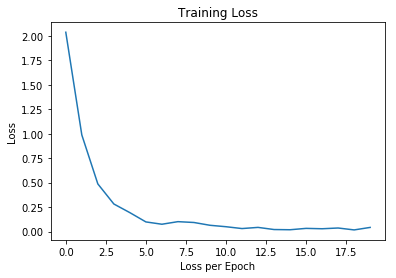

In [14]:
# Answer for Question 3.2: Plot the loss for both training and validation

<b>Step 4</b>: Plot out the result of accuracy for both training and validation.

Text(0.5,0,'Accuracy per Epoch')

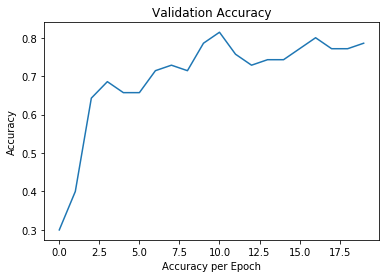

In [15]:
# Answer for Question 3.2: Plot the accuracy for both training and validation

<h3 id="a33">Answer 3.3: Plot 5 Random Images with their predictions</h3><b>3 points</b>

Use the <b>validation_dataset</b> to see whether model can predict. (You will use the <b>test_dataset</b> in the future lab. Use the <b>validation_dataset</b> for now.) Notice that you need to set the <code>shuffle</code> to <code>False</code>, so the the order of predictions will be the same as the file loading order.

In [16]:
# Generate test dataset and generate the prediction results

test_valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=False)

Found 70 images belonging to 7 classes.


Create a test dataset using validation data. Plot 5 random images which index is in the <code>numbers</code> list. Also print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.

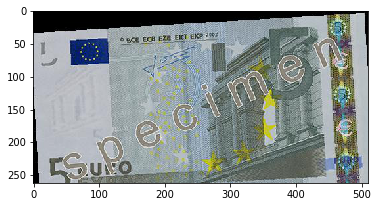

predicted: 200 (Mis-classified)


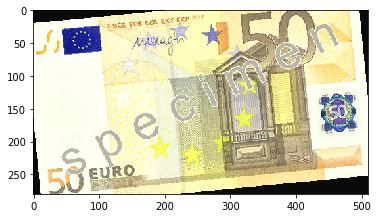

predicted: 50 (Correctly Classified)


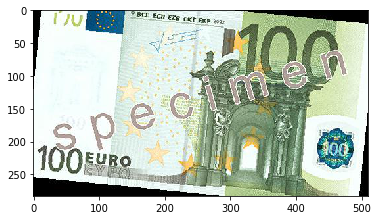

predicted: 100 (Correctly Classified)


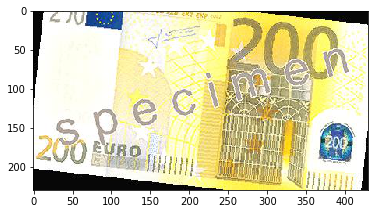

predicted: 200 (Correctly Classified)


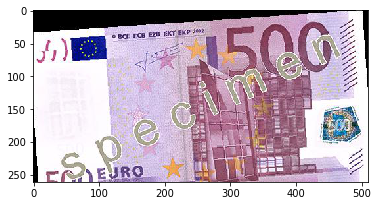

predicted: 500 (Correctly Classified)


In [17]:
# Answer for Question 3.3: Plot five random images and their predictions

<h3 id="a34">Answer 3.4: Use the second model <code>VGG16</code> to do the prediction</h3><b>5 points</b>

Repeat the steps in Question 3.1, 3.2 to predict the result using <code>VGG16</code> model. Then, print out the last validation accuracy.

In [18]:
# Answer for Question 3.4: Use VGG16 to train the model and print out the last validation accuracy.

553467904/553467096 [==============================] - 30s 0us/step
Epoch 1/5
7/7 [==============================] - 24s 3s/step - loss: 3.2447 - acc: 0.2714 - val_loss: 1.6357 - val_acc: 0.3286
Epoch 2/5
7/7 [==============================] - 20s 3s/step - loss: 0.7692 - acc: 0.7571 - val_loss: 0.2737 - val_acc: 0.9429
Epoch 3/5
7/7 [==============================] - 22s 3s/step - loss: 0.0898 - acc: 1.0000 - val_loss: 0.2505 - val_acc: 0.9429
Epoch 4/5
7/7 [==============================] - 20s 3s/step - loss: 0.0487 - acc: 1.0000 - val_loss: 0.1234 - val_acc: 0.9714
Epoch 5/5
7/7 [==============================] - 21s 3s/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0575 - val_acc: 0.9857
The last validation accuracy:  0.9857142865657806


<a href="http://cocl.us/NotebooksPython101bottom">
    <img src="https://ibm.box.com/shared/static/irypdxea2q4th88zu1o1tsd06dya10go.png" width="750" alt="course Python 101"/>
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.